# Projections

Alternative aux régressions linéaires pour l'analyse des données.

## Données

On considère qu'une donnée $x_i$ est décrite par $m$ caractéristiques réelles. La donnée $x_i$ est ainsi assimilable à un vecteur $x_i = (x_i^1, \dots, x_i^m)$ de $\mathbb{R}^m$. Si l'on possède $n$ données, on peut les représenter sous la forme d'une matrice :

$$X = \left(
\begin{array}{cccccc}
x^1_1&\dots &x^j_1 &\dots &x_1^m\\
     &      &\vdots&      &  \\
x_i^1&\dots &x^j_i &\dots &x_i^m\\
     &      &\vdots&      & \\
x_n^1&\dots &x^j_n&\dots &x_n^m
\end{array}
\right)$$

Où :

* une donnée est un vecteur ligne $x_i$ à $m$ coordonnées
* un caractère est un vecteur colonne  $x^j$  à $n$ coordonnées

L'analyse de données numériques utilisant souvent des méthode géométriques (les données $x_i$ sont des points d'un espace vectoriel $\mathbb{R}^m$), on aura tendance à :

* assimiler les données à des points
* nommer  ***nuage de points** l'ensemble de nos données
* le point $g = (\overline{x^1}, \dots, \overline{x^j}, \dots, overline{x^m})$ constitué des moyennes de chaque caractère est nommé ***centre de gravité du nuage***

## Définition du problème

On cherche à trouver la droite $\mathcal{D}$ qui minimise globalement la projection de nos données sur celle-ci. De façon analogue à la régression on cherche à minimiser globalement l'erreur entre le point réel $x$ et sont approximé $p_\mathcal{D}(x)$ (la projection de de $x$ sur $\mathcal{D}$) :

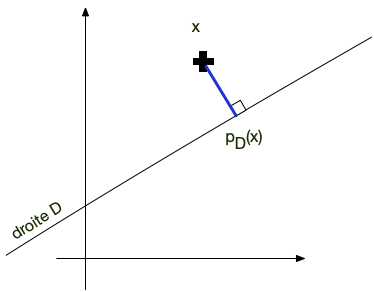

In [3]:
from IPython import display

display.display(display.Image("projection-opti.png"))

La droite minimisant les projection de nos $n$ données $x_i$ est alors la droite $\mathcal{D}$ qui minimise la fonction :

$$
f(\mathcal{D}) = \sum_{1 \leq i \leq n} \frac{1}{n}||x_i - p_\mathcal{D}(x_i)||_2^2 = \sum_{1 \leq i \leq n} \frac{1}{n} (x_i - p_\mathcal{D}(x_i))^2
$$

On peut manipuler cette équation pour en savoir plus sur cette droite optimale, que l'on appellera $\mathcal{D}^\star$.

### Analyse du problème

On remarque que $x_i$, $p_\mathcal{D}(x_i)$ et $p_\mathcal{D}(g)$ ($g$ est le centre de gravité du nuage) forment un triangle rectangle en $p_\mathcal{D}(x_i)$ puisque $p_\mathcal{D}(g)$ est sur la droite. Pythagore nous indique alors que :

$$
||p_\mathcal{D}(g) - x_i||_2^2 = ||p_\mathcal{D}(x_i) - x_i||_2^2 + ||p_\mathcal{D}(x_i) - p_\mathcal{D}(g)||_2^2
$$

De là : 

$$
f(\mathcal{D}) = \sum_{1 \leq i \leq n}  \frac{1}{n}||x_i - p_\mathcal{D}(x_i)||_2^2 = \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(g) - x_i||_2^2 - \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(x_i) - p_\mathcal{D}(g)||_2^2
$$

En appliquant le [théorème de König-Huygens](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_K%C3%B6nig-Huygens#%C3%89nonc%C3%A9_en_statistiques) qui stipule que :

$$
\sum_{1 \leq i \leq n} \frac{1}{n}||x_i - p_\mathcal{D}(g)||_2^2 = \sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2 + ||g - p_\mathcal{D}(g)||_2^2
$$

On obtient : 

$$
f(\mathcal{D}) = \sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2 + ||g - p_\mathcal{D}(g)||_2^2 - \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(x_i) - p_\mathcal{D}(g)||_2^2
$$

Comme $||p_\mathcal{D}(x_i) - p_\mathcal{D}(g)||_2^2$ est une constante pour toute droite parallèle à $\mathcal{D}$ on en déduit que la droite $\mathcal{D}^\star$ minimisant $f$ passe **nécessairement** par $g$ (dans ce cas $g = \mathcal{D}^\star(g)$). 

Si l'on se restreint aux droite passant par $g$, $f$ se récrit :

$$
\begin{array}{ccc}
f(\mathcal{D}) &= &\sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2 - \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(x_i) - p_\mathcal{D}(g)||_2^2\\
&=&\sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2 - \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(x_i - g)||_2^2
\end{array}
$$

> La droite minimisant les projections, **tout comme les droites de régressions** passe par le centre de gravité du nuage de points.

La droite $\mathcal{D}^\star$ recherchée est donc aussi celle maximisant :

$$
g(\mathcal{D}) = \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(x_i - g)||_2^2
$$

> $||x_i - g||_2$ est la ***longueur*** de la donnée $i$, on cherche à **maximiser** la longueur des projetés $||p_\mathcal{D}(x_i - g)||_2$

### Information et inertie du nuage

L'erreur produite en considérant les points $p_{\mathcal{D}^\star}(x_i)$ plutôt que les points initiaux $x_i$ vaut :

$$
f(\mathcal{D}^\star) = \sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2 - \sum_{1 \leq i \leq n} \frac{1}{n}||p_{\mathcal{D}^\star}(x_i) - p_{\mathcal{D}^\star}(g)||_2^2
$$

La quantité $I = \sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2$ est appelée [***inertie du nuage***](https://fr.wikipedia.org/wiki/Inertie) et vaut la **variance** de celui-ci. En analyse des donnée cette quantité est synonyme de ***l'information*** contenue dans le nuage.

La régression essaie d'expliquer une caractéristique par une (ou plusieurs) autres, la projection cherche à trouver un axe (une nouvelle caractéristique) combinant au mieux les caractéristiques initiales, c'est à dire conservant le maximum d'information.

> La droite $\mathcal{D}^\star$ recherchée est celle qui **maximise l'information conservée**. On cherche **un axe** qui explique au mieux les $m$ axes (caractéristiques) initiaux.

### Corrélations

Supposons que l'on ait la droite $\mathcal{D}^\star$ maximisant l'information (inertie, variance) conservée du nuage. On sait que cette droite passe par le centre de gravité du nuage $g$ et considérons $\overrightarrow{u}$ un vecteur directeur unitaire ($||\overrightarrow{u}||_2 = 1$) de celle-ci.

Ce vecteur est une combinaison linaire des caractéristiques initiales (les $x^j$, pour $1 \leq j \leq m$) et pour savoir comment il réagit par rapport à celles-ci on a coutume de considérer ses **corrélations linaires** avec celles ci.

* si $r(\overrightarrow{u}, x^j) \simeq 1$ : 
  * les points $x_i$ se projetant dans le sens de $\overrightarrow{u}$ auront tendance à avoir une valeur $x_i^j$ importante,
  * les points $x_i$ se projetant dans le sens opposé de $\overrightarrow{u}$ auront tendance à avoir une valeur $x_i^j$ faible,
* si $r(\overrightarrow{u}, x^j) \simeq -1$ : 
  * les points $x_i$ se projetant dans le sens de $\overrightarrow{u}$ auront tendance à avoir une valeur $x_i^j$ faible,
  * les points $x_i$ se projetant dans le sens opposé de $\overrightarrow{u}$ auront tendance à avoir une valeur $x_i^j$ importante,
* si $r(\overrightarrow{u}, x^j) \simeq 0$ : la caractéristique $x^j$ n'influe pas linéairement sur $\overrightarrow{u}$

## Calcul de l'axe

On suppose à partir de maintenant que nos données **centrées**. Cela va rendre la résolution plus élégante, sans perte de généralité.


D'après ce qui précède, on cherche à maximiser $g$ pour les droites $\mathcal{D}$ passant par l'origine :

$$
g(\mathcal{D}) = \sum_{1 \leq i \leq n} \frac{1}{n}||p_\mathcal{D}(x_i)||_2^2
$$

### ré-écriture matricielle du problème

Les droites que l'on considère passant toutes par l'origine, chacune d'entre elle est entièrement déterminée par un vecteur directeur unitaire **colonne** $\overrightarrow{u}$ à $m$ dimensions. On a :

* $\overrightarrow{u} = (u_1, \dots, u_m)$
* $||\overrightarrow{u} ||_2 = 1$

De là, en utilisant la matrice de donnée $X$, on a : 

$$ X \cdot \overrightarrow{u} =
\left(
\begin{array}{c}
p_\mathcal{D}(x_1)\\
\vdots\\
p_\mathcal{D}(x_i)\\
\vdots \\
p_\mathcal{D}(x_n)
\end{array}
\right)$$

et donc :

$$
g(\mathcal{D}) = ^t(X\overrightarrow{u})D(X\overrightarrow{u}) = ^tu(^tXDX)\overrightarrow{u}
$$

Avec $D = \frac{1}{n} \cdot I_n$ ($I_n$ est la matrice identité à $n$ lignes).

On conclut ce calcul matriciel en remarquant que $(^tXDX)$ est égale à la ***matrice de variance $V$*** (matrice carrée symétrique à $m$ dimensions) :


$$(^tXDX) = V = \left(
\begin{array}{cccccc}
\text{cov}(x^1, x^1)&\dots &\text{cov}(x^1, x^j) &\dots &\text{cov}(x^1, x^m)\\
     &      &\vdots&      &  \\
\text{cov}(x^i, x^1)&\dots &\text{cov}(x^i, x^j)&\dots &\text{cov}(x^i, x^m)\\
     &      &\vdots&      & \\
\text{cov}(x^m, x^1)&\dots &\text{cov}(x^m, x^j)&\dots &\text{cov}(x^m, x^m)
\end{array}
\right)
$$

Notre problème revient ainsi à trouver un vecteur unitaire $\overrightarrow{u}$ maximisant l'équation : 
$$^t\overrightarrow{u}V\overrightarrow{u}$$

### Résolution

Trouver un vecteur unitaire $\overrightarrow{u}^\star$ maximisant l'équation : 
$$^t\overrightarrow{u}V\overrightarrow{u}$$

On a donc :
* Si $\overrightarrow{u}$ est un vecteur propre unitaire de $V$ on a $Vu = \lambda \overrightarrow{u}$ et de là ${^t\overrightarrow{u}} V u = \lambda {^t \overrightarrow{u}}u = \lambda ||\overrightarrow{u}||_2^2 = \lambda$. On en déduit que $\lambda \geq 0$ pour tout vecteur propre.
* $V$ est symétrique

Les remarques précédentes montrent que $V$ est une **matrice semi-définie positive** : ses vecteurs propres unitaires forment une base orthonormée de $\mathbb{R}^m$. Soient alors $(u_1, \dots u_m)$ une base orthonormée de vecteurs propres de $V$ associés aux valeurs propres $\lambda_1 \geq \dots \geq \lambda_m$. 

Tout vecteur unitaire $\overrightarrow{u}$ peut donc s'écrire sous la forme :

$$
\overrightarrow{u} = \sum_{i=1}^m \alpha_i u_i
$$ 

De là :

$$ {^t\overrightarrow{u}} V \overrightarrow{u}  = {^t(\sum_{i=1}^p} \alpha_i u_i) V (\sum_{i=1}^p \alpha_i u_i) = \sum_{i, j} \lambda_j \alpha_i \alpha_j {^tu_i} u_j = \sum_{i} \lambda_i \alpha_i^2 \leq \lambda_1 \sum_i \alpha_i^2 = \lambda_1$$

Et comme :

$$
{^tu_1} V u_1 = \lambda_1
$$

> La droite $\mathcal{D}^\star$ maximisant les projections est celle de vecteur directeur $u_1$ qui est le vecteur propre de $V$ associé à la plus grande de ses valeurs propres $\lambda_1$. Cet axe est appelé ***axe factoriel***

### Valeurs des projetés

La droite de projection $\mathcal{D}^\star$ est la droite :

* passant par $0$ (car nos données sont centrée)
* de vecteur directeur, le vecteur propre (vecteur colonne $u_1$) associé à la plus grande valeur propre ($\lambda_1$) de la matrice de variance des données.

Ceci s'écrit :

$$\left(
\begin{array}{c}
p_{\mathcal{D}^\star}(x_1)\\
\vdots\\
p_{\mathcal{D}^\star}(x_i)\\
\vdots\\
p_{\mathcal{D}^\star}(x_n)
\end{array}
\right) =
\left(
\begin{array}{c}
x_1 \cdot u_1\\
\vdots\\
x_i \cdot u_1 \\
\vdots\\
x_n \cdot u_1
\end{array}
\right) =

Xu_1 = c
$$

> Les coordonnées $c = Xu_1$ des points sur l'axe principal sont nommées ***composantes principales***.

### Analyse de la projection

L'axe factoriel $\mathcal{D}^\star$ passe par l'origine car nos données sont centrées et son vecteur directeur est le vecteur propre $u_1$ associé à la plus grande valeur propre $\lambda_1$ de la matrice de variance des données.

#### Information conservé

On a :

* **information du nuage** qui est égale à son inertie : $I = \sum_{1 \leq i \leq n} \frac{1}{n}||x_i - g||_2^2 =  \sum_{1 \leq i \leq n} \frac{1}{n}||x_i||_2^2$ (les données sont centrées)
* **information de l'axe factoriel** qui est égale à l'inertie des projections : $I_{\mathcal{D}^\star} = \sum_{1 \leq i \leq n} \frac{1}{n}||p_{\mathcal{D}^\star}(x_i) - p_{\mathcal{D}^\star}(g)||_2^2 =  \sum_{1 \leq i \leq n} \frac{1}{n}||p_{\mathcal{D}^\star}(x_i)||_2^2$ (car $\mathcal{D}^\star$ passe par $g$) et on a vu que $I_{\mathcal{D}^\star} = \lambda_1$ la plus grande valeur propre de la matrice de variance.

> Le ***pourcentage d'information véhiculée par l'axe principal'*** est égale à : ${I_{\mathcal{D}^\star}} / {I}$

#### Interprétation de l'axe factoriel

L'axe factoriel rend compte **des tendances** lourdes des données. Pour connaître lesquelles, on a coutume de regarder les corrélations des caractéristiques initiales avec la nouvelle caractéristique : $\text{cor}(c, x^j)$, pour $1 \leq j \leq m$.

Ces corrélation nous donnerons :

* les caractéristiques qui ne donnent pas de tendances à l'axe : celle de corrélation proche de 0
* les caractéristiques de tendances positive à l'axe (les coordonnée selon l'axe factoriel et selon la caractéristique vont dans le même sens) : celles de corrélation proche de 1
* les caractéristiques de tendances négative à l'axe (les coordonnée selon l'axe factoriel et selon la caractéristique vont dans le sens opposé) : celles de corrélation proche de -1

#### Qualité de la projection

Si l'axe factoriel est celui qui maximise **globalement** les projections, il se peut d'individuellement, certaines données ne se représentent pas bien sur cet axe. 

> La ***qualité de la projection de $x_i$*** est calculée par : $||p_\mathcal{D}(x_i)|| / ||x_i|| = ||x_i \cdot u_1|| / ||x_i|| = \cos(\theta_i)$, avec $\theta_i$ l'angle que fait 

Plus l'angle entre la donnée initiale et l'axe est importante, plus il se projettera vers l'origine, moins il faudra en tenir compte dans l'analyse.

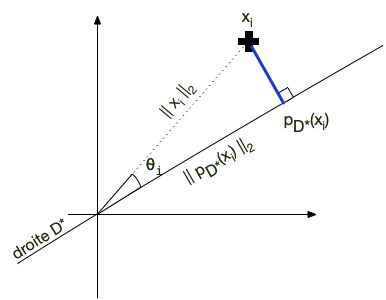

In [4]:
display.display(display.Image("projection-données.png"))

## Plus de 1 axe

Soit $(u_1, \dots u_m)$ une base orthonormée de vecteurs propres de la matrice de variance $V$ associés aux valeurs propres $\lambda_1 \geq \dots \geq \lambda_m$. 

On peut montrer que chercher un sous espace vectoriel de dimension $k$ maximisant la projection des données correspond à l'espace formé des $k$ premiers vecteurs propres $(u_1, \dots, u_k)$. L'information conservée par ce sous espace est $\sum_{1 \leq j \leq k} \lambda_j$

> La base des vecteurs propres de la matrice de variance correspond à une base correspondant mieux aux données puisque chaque axe est proche

Lorsque l'on analyse $k$ axes, on regarde donc les $k$ premiers vecteurs propres, car c'est ceux qui vont maximiser l'information conservée.

Enfin, les représentations graphiques se font en choisissant deux axes (souvent $u_1 et $u_2$ mais pas toujours) qui permettent de visualiser les points, même si l'espace de départ est très grand $m >> 1$. On est garantit que les axes choisit sont significatifs pour les données, ce qui n'est pas le cas si l'on prend 2 caractéristiques initiales.

### Vecteurs propres

L'ensemble des vecteurs propres de la matrice de variance est noté $U$.C'est une matrice carrée à $m$ dimensions, où chaque colonne colonne correspond à un vecteur propre (la $j$ème colonne correspond à $u_j$) écrit dans la base initiale.

La $j$ème colonne expliquera $\lambda_j / I$ pourcent de l'information totale.

### Composantes principales

Les composantes principales correspondent aux coordonnées des points dans la base des vecteurs propres. Elle se note sous la forme matricielle par une une matrice $C$ à $m$ colonnes et $n$ lignes telle que :

$$C = XU$$

La $j$ème colonne de $C$, notée $c^j$, correspond aux coordonnées des $n$ point selon le vecteur propre $u_j$ et la $i$ème ligne, notée $c_i$ correspond aux valeurs du $i$ème point dans la nouvelle base.

### Qualité de la projection

La qualité de la projection d'un point $x_i$ selon l'axe $u_j$ s'exprime avec le $\cos^2(\theta_i^j)$ de l'angle $\theta_i^j$ qu'il fait avec cet axe. :

$$\cos^2(\theta^j_i) = \frac{(c_i^j)^2}{\frac{1}{n}(\sum_{1\leq k \leq m} (x_i^k)^2)}$$

> On utilise les $\cos^2$ pour mesurer la qualité de la projection car ils s'additionnent : Le $\cos^2$ de l'angle que fait le point $x_i$ avec les axes $u_j$ et $u_k$ vaut $\cos^2(\theta^j_i) + \cos^2(\theta^k_i)$

### Corrélations

La corrélation de l'axe $u_j$ par rapport aux anciennes caractéristiques $x^i$ ($1 \leq i \leq m$) s'écrit : 

$$\text(corr)(x^i, c^j)$$

Lorsque l'on considère deux axes $u_j$ et $u_k$, on peut montrer que  : 

$$0 \leq \text{cor}^2(x^i, c^j) + \text{cor}^2(x^i, c^k) \leq 1$$

Les points $(\text{cor}^2(x^i, c^j), \text{cor}^2(x^i, c^k))$ pour $1 \leq i \leq m$ sont donc tous dans le disque unité. On appelle l'ensemble de ces points le ***cercle des corrélations pour les axes $j$ et $k$***. Il montre dans une figure synthétique les corrélations entre les anciennes caractéristiques et deux nouvelles ($j$ et $k$).


## Données centrées et réduites

Lorsque les données sont centrées et réduites l'information de chaque axe se calcule plus aisément.

Si les **données sont centrées et réduites**, on a $||x^j||_2 = 1$ pour tout $1 \leq j \leq m$ et donc :

* chaque caractéristique initiale véhicule une information (inertie) de 1
* l'information totale du nuage est $I = m$
* le pourcentage d'information véhiculé par chaque nouvel axe vaut $\frac{\lambda_1}{m}$

> Dans une optique d'**Analyse des données** nos projections se feront **toujours** sur des données centrées et réduites.

## Exemple de l'épreuve

On reprend nos données d'épreuve.


### Création des données $X$

In [ ]:
import pandas

épreuve = pandas.read_csv("./épreuve.txt", delim_whitespace=True)
épreuve

On centre et on réduit nos données et on appelle nos données $X$

In [ ]:
data = épreuve   # nom du jeu de données

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

### Informations du nuage

On vérifie que l'information totale de notre nuage vaut 2 et que chaque axe véhicule une information de 1.

#### Inertie du nuage

> **Attention** : `X ** 2`est le produit terme à term , pas la multiplication de matrice

In [ ]:
I = sum((X ** 2).sum(axis=1)) / len(X.index)

I

#### Pour chaque axe

In [ ]:
# pour chaque axe

(X ** 2).sum(axis=0) / len(X.index)

#### Axe quelconque

On peut essayer de calculer l'inertie d'un axe quelconque.


Commençons par trouver un axe unitaire quelconque :

In [ ]:
from random import uniform
from math import pi, cos, sin
import numpy as np

theta = uniform(0, pi)
u = np.array([cos(theta), sin(theta)])

u 

L'inertie associé à cet axe est :

In [ ]:
1/len(X) * sum((X @ u) ** 2)

Et son pourcentage d'inertie :

In [ ]:
(1/len(X) * sum((X @ u) ** 2)) / 2

### Coordonnées de chaque individu pour chaque axe

Il suffit de faire le produit scalaire de $X$ avec un vecteur directeur de l'axe. 

Nos caractéristiques initiales sont $e_1 = (1, 0)$ et $e_2 = (0, 1)$.

> En pandas, le [produit matriciel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dot.html) est soit la méthode [`pandas.DataFrame.dot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dot.html) soit l'opérateur `@`

In [ ]:
X.dot((1, 0)) # équivalent à X @ (0, 1)

In [ ]:
X @ (0, 1) # équivalent à X.dot((0, 1))

### Longueur des individus

> **Attention !** Ce n'est pas parce que nos données sont centrées et réduites que la longueur de chaque individu vaut 1. Ce sont les caractéristiques qui sont de moyennes nulle et de variance 1.

In [ ]:

normes = (X ** 2).sum(axis=1)  / len(X.columns)

normes

### Qualité de la projection

On regarde le $\cos^2$ de l'angle pour chaque chaque individu et pour chaque axe. 

> On utilise les $\cos^2$ car ils s'additionnent si l'on cherche la projection sur un plan.

In [ ]:
(X ** 2).div(normes, axis=0)

La somme des $\cos^2$ fait bien 1 pour chaque individu.

### Matrice de corrélation

On va procéder à la recherche des axes factoriels, ce qui revient à chercher les vecteur propres de la matrice de variance. 

> Dans le cas de données **centrées et réduites**, la matrice de variance est égale à la matrice des corrélations.

In [ ]:
X.corr()

In [ ]:
import numpy as np

D = 1/len(X.index) * np.identity(len(X.index))

X.transpose() @ D @ X


### Résolution des projections

Le code ci-dessous crée toutes les données nécessaires pour utiliser les axes factoriels

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA 

pca = PCA() 
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

corrélations = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2 = (C**2).div((X**2).sum(axis=1), axis='index')

In [ ]:
U

In [ ]:
I

In [ ]:
C

In [ ]:
corrélations

In [ ]:
cos2

### Information expliquée

In [ ]:
I

Le premier axe (axe 0) explique prêt de 90% de l'information du nuage.

### Représentation graphique

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Le code ci-dessous est générique, on change les variables `axe_x` et `axe_y` avec le numéros des axes factoriels à représenter

In [ ]:
axe_x = 0
axe_y = 1

couleurs = [sns.color_palette()[0]] * len(C) # une couleur pour chaque donnée

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs, ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show() 

### Cercle des corrélations

In [ ]:
axe_x = 0
axe_y = 1

couleurs = [sns.color_palette()[3]] * len(corrélations)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = corrélations.plot.scatter(x=axe_x, y=axe_y, ax=ax, 
                                 color=couleurs)


for index, row in corrélations.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))

draw.add_patch(plt.Circle((0, 0), radius=1, color=(0, 0, 0, .3)))

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0)
plt.axhline(0)

plt.show()

* L'axe 0 (horizontal) est très corrélé au temps et aux erreurs
* L'axe 1 (vertical) oppose le temps et les erreurs

Le 1er axe est un axe d'**aptitude** : les élèves se projetant à droite auront pris beaucoup de temps et fait beaucoup d'erreurs, ceux se projetant à gauche auront pris peu de temps et fait peut d'erreurs. Le second axe est un axe d'**attitude**. Les élèves se projetant en haut auront bâclé leur contrôle en terminant rapidement au détriment de l'exactitude, les élèves se projetant en bas auront  pris leur temps pour faire peu d'erreurs.


### Qualité de la représentation

On montre les $\cos^2$ des différentes données aux 2 axes factoriels

In [ ]:
cos2

Comme on a que 2 axes, la somme des colonnes pour chaque ligne fait 1 : un point bien projeté sur un axe signifie mal projeté sur l'autre.

Les élèves les plus marqué par le second axe sont ceux ne se représentant pas bien sur le 1er. C'est les élèves 1 et 9 essentiellement.